<a href="https://colab.research.google.com/github/SarathSabu/Python-Notebooks/blob/main/Simulation_Vaccine_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0, '/content/drive/My Drive/info 645')
print(sys.path)

['/content/drive/My Drive/info 645', '/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor', '/root/.ipython']


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from brooks import *
import matplotlib.pyplot as plt


In [ ]:
# Load and preprocess the data
data = pd.read_excel('/content/drive/My Drive/info 645/OuRx.xlsx')
filtered_data = data.loc[data["Vaccine Demand"] < 30000000]

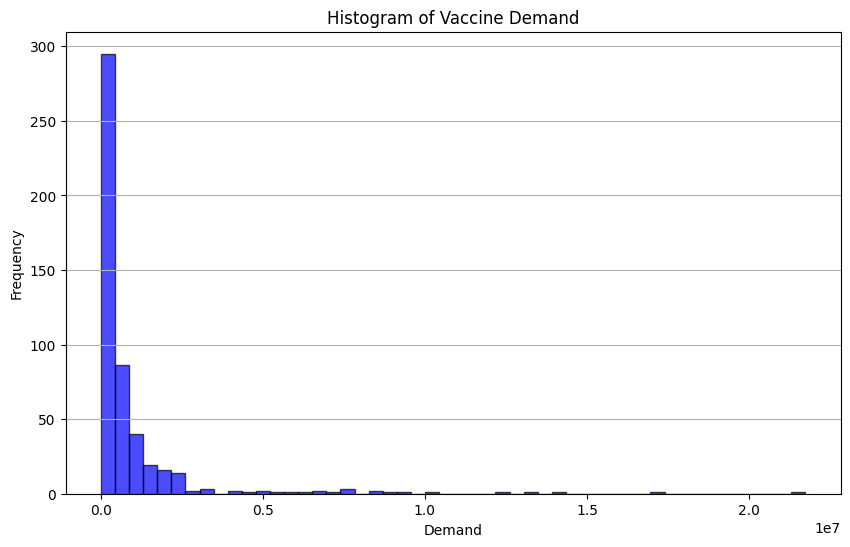

In [ ]:
# Plot a histogram of the filtered data
plt.figure(figsize=(10, 6))
plt.hist(filtered_data["Vaccine Demand"], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogram of Vaccine Demand")
plt.xlabel("Demand")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()


In [ ]:
(my_scale) = test_distribution(filtered_data["Vaccine Demand"], "exponential")
(alpha, beta) = test_distribution(filtered_data["Vaccine Demand"], "gamma")

For an exponential distribution, the scale parameter estimate is 924033.462926.
The test statistic for a exponential distribution is 184.843432 and the p-value is 0.000133.
For a gamma distribution, the alpha estimate is 0.560517 and the scale = 1/beta estimate is 1648536.845273.
The test statistic for a gamma distribution is 88.282388 and the p-value is 0.984214.


In [ ]:
(log_mean, log_std) = test_distribution(filtered_data["Vaccine Demand"], "lognormal")
print(log_mean, log_std)

For a lognormal distribution, the log mean estimate is 12.622927 and the log stdev estimate is 1.486323.
The test statistic for a lognormal distribution is 29.309394 and the p-value is 1.000000.
12.622926731401646 1.4863231192380928


In [ ]:
# Fit normal distribution to the filtered data
mu, sigma = norm.fit(filtered_data["Vaccine Demand"])

# Simulation parameters
simulations = 1000
rg=np.random.default_rng(12345)
simulated_demand = rg.lognormal(mean=log_mean, sigma=log_std, size=simulations)
order_quantities = [400000, 450000, 500000, 550000, 600000]
wholesale_price = 12
retail_price = 20

# Run simulation
results = []
for q in order_quantities:
    profits = []
    stockouts = 0

    for demand in simulated_demand:
        if demanqd > q:  # Stockout case
            profit = q * (retail_price - wholesale_price)
            stockouts += 1
        else:  # No stockout case
            profit = (demand * retail_price) - (q * wholesale_price)

        profits.append(profit)

    # Compute metrics
    expected_profit = np.mean(profits)
    credible_interval = np.percentile(profits, [2.5, 97.5])
    stockout_prob = stockouts / simulations

    results.append({
        "Order Quantity": q,
        "Expected Profit": expected_profit,
        "95% Credible Interval": credible_interval,
        "Stockout Probability": stockout_prob
    })
# Create results DataFrame
results_df = pd.DataFrame(results)

# Save results
results_df.to_csv("monte_carlo_results.csv", index=False)
print("Monte Carlo simulation completed. Results saved to 'monte_carlo_results.csv'.")

Monte Carlo simulation completed. Results saved to 'monte_carlo_results.csv'.


In [ ]:
print(results_df)

   Order Quantity  Expected Profit            95% Credible Interval  \
0          400000    424309.121882  [-4513101.108016441, 3200000.0]   
1          450000    246116.951480  [-5113101.108016441, 3600000.0]   
2          500000     35303.789436  [-5713101.108016441, 4000000.0]   
3          550000   -200116.751174  [-6313101.108016441, 4400000.0]   
4          600000   -463708.991334  [-6913101.108016441, 4800000.0]   

   Stockout Probability  
0                 0.440  
1                 0.405  
2                 0.375  
3                 0.351  
4                 0.328  


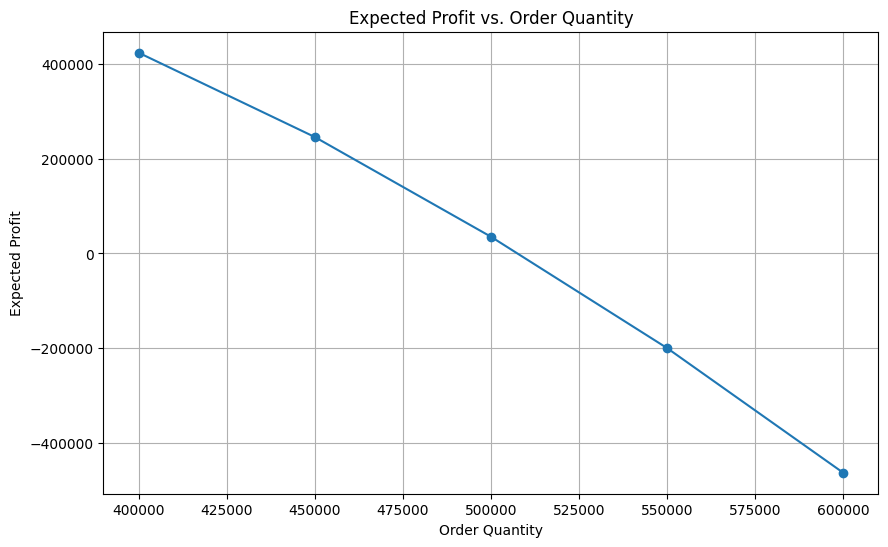

In [ ]:
# Plotting Expected Profit
plt.figure(figsize=(10, 6))
plt.plot(results_df["Order Quantity"], results_df["Expected Profit"], marker='o')
plt.title("Expected Profit vs. Order Quantity")
plt.xlabel("Order Quantity")
plt.ylabel("Expected Profit")
plt.grid()
plt.show()


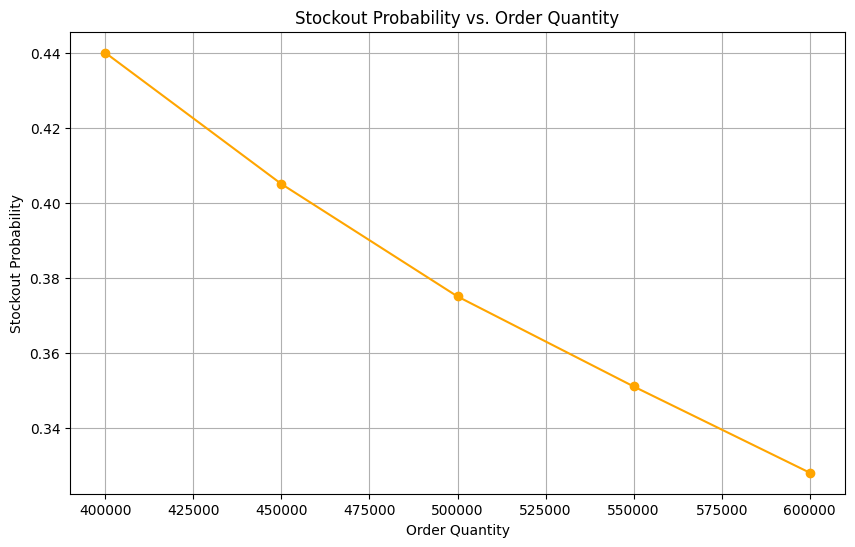

In [ ]:
# Plotting Stockout Probability
plt.figure(figsize=(10, 6))
plt.plot(results_df["Order Quantity"], results_df["Stockout Probability"], marker='o', color='orange')
plt.title("Stockout Probability vs. Order Quantity")
plt.xlabel("Order Quantity")
plt.ylabel("Stockout Probability")
plt.grid()
plt.show()



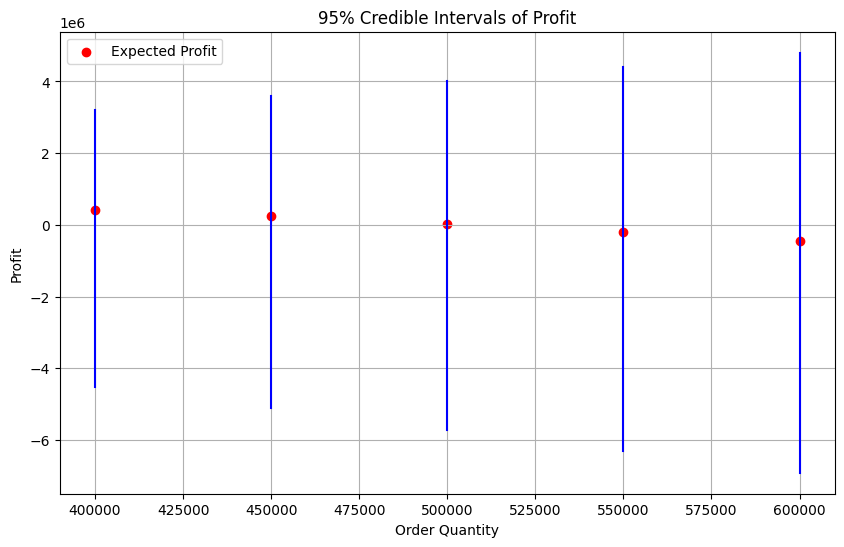

In [ ]:
# Plotting 95% Credible Intervals
plt.figure(figsize=(10, 6))
for i, row in results_df.iterrows():
    plt.plot([row["Order Quantity"], row["Order Quantity"]],
             row["95% Credible Interval"], color='blue')
plt.scatter(results_df["Order Quantity"], results_df["Expected Profit"], color='red', label="Expected Profit")
plt.title("95% Credible Intervals of Profit")
plt.xlabel("Order Quantity")
plt.ylabel("Profit")
plt.legend()
plt.grid()
plt.show()